Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score


Connect your Google Drive. 
Since the files are quite big, it is much more convinient to upload them in a cloud service.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read prepared train-test files

In [ ]:
link_to_drive = '/content/drive/MyDrive/DL_Final_Project/'

In [ ]:
X_val   = np.load(link_to_drive + 'X_val.npy')
X_train = np.load(link_to_drive + 'X_train.npy')
y_val   = np.load(link_to_drive + 'y_val.npy')
y_train = np.load(link_to_drive + 'y_train.npy')
X_test  = np.load(link_to_drive + 'X_test.npy')
y_test  = pd.read_csv(link_to_drive + 'Test.csv')

Initialization

In [ ]:
epochs = 100
batch_size = 64
loss_function = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

Build a Feed Forward Neural Network (FNN).

In [ ]:
X_test.shape

(12630, 30, 30, 3)

In [ ]:
X_train = X_train.reshape([-1, X_train.shape[1]*X_train.shape[2]*X_train.shape[3]])
X_test  = X_test.reshape([-1, X_test.shape[1]*X_test.shape[2]*X_test.shape[3]])
X_val = X_val.reshape([-1, X_val.shape[1]*X_val.shape[2]*X_val.shape[3]])

In [ ]:
print('Train shape =', X_train.shape , '\nTest shape =', X_test.shape)

Train shape = (31367, 2700) 
Test shape = (12630, 2700)


In [ ]:
y_train.shape[1]

43

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(43, activation='softmax'))

sgd = SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=loss_function, optimizer=sgd, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               691456    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 43)                2795      
                                                                 
Total params: 735,403
Trainable params: 735,403
Non-trainable params: 0
_________________________________________________________________


Train the FNN model

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/100
491/491 [==============================] - 2s 4ms/step - loss: 3.6306 - accuracy: 0.0596 - val_loss: 3.4833 - val_accuracy: 0.1171
Epoch 2/100
491/491 [==============================] - 2s 3ms/step - loss: 3.4271 - accuracy: 0.1648 - val_loss: 3.3670 - val_accuracy: 0.2150
Epoch 3/100
491/491 [==============================] - 2s 3ms/step - loss: 3.3349 - accuracy: 0.2307 - val_loss: 3.2843 - val_accuracy: 0.2494
Epoch 4/100
491/491 [==============================] - 2s 4ms/step - loss: 3.2466 - accuracy: 0.2506 - val_loss: 3.1861 - val_accuracy: 0.2689
Epoch 5/100
491/491 [==============================] - 2s 3ms/step - loss: 3.1404 - accuracy: 0.2710 - val_loss: 3.0734 - val_accuracy: 0.2911
Epoch 6/100
491/491 [==============================] - 2s 3ms/step - loss: 3.0229 - accuracy: 0.2935 - val_loss: 2.9658 - val_accuracy: 0.3054
Epoch 7/100
491/491 [==============================] - 2s 3ms/step - loss: 2.8963 - accuracy: 0.3226 - val_loss: 2.8151 - val_accuracy: 0.3568

Plot the graphs for accuracy and loss of both datasets

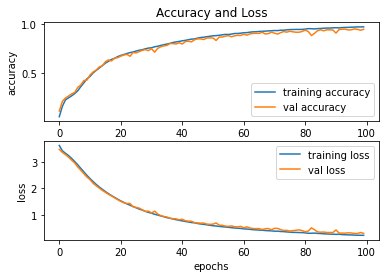

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('accuracy_loss.png')


Test the trained model with test dataset

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
labels = y_test['ClassId'].values
print(accuracy_score(labels, classes_x))

0.8642121931908155
